# 1 Web Mining

In [1]:
from pandas import DataFrame
from time import sleep
from datetime import datetime
from random import uniform, choice
from requests import get
from bs4 import BeautifulSoup

!python --version # 3.10.11

Python 3.10.11


In [2]:
now = datetime.now().isoformat(sep='_')
now = now.split('.')[0].split(':')[:2]
now = 'h'.join(now).replace('-', '_')
now

'2023_08_06_23h23'

In [3]:
url_root = 'https://g1.globo.com/'

user_agents = [
    'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/109.0.0.0 Safari/537.36'
    'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/109.0.0.0 Safari/537.36'
    'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/108.0.0.0 Safari/537.36'
    'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/108.0.0.0 Safari/537.36'
    'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/108.0.0.0 Safari/537.36'
    'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/16.1 Safari/605.1.15'
    'Mozilla/5.0 (Macintosh; Intel Mac OS X 13_1) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/16.1 Safari/605.1.15'
]

As defini√ß√µes do G1 n√£o permitem fazer scraping/crawling na p√°gina de "busca", conforme mostrado em seu arquivo `robots.txt`:

In [4]:
url_robots = url_root + 'robots.txt'
resp_robots = get(url_robots).content
soup_robots = BeautifulSoup(resp_robots, 'html.parser')
print(soup_robots)

User-Agent: *
Disallow: /jornalismo/g1/
Disallow: /_ssi/
Disallow: /teste-*.html$
Disallow: /beta/
Disallow: /componentes/
Disallow: /busca/*
Disallow: /globo-news/jornal-globo-news/videos/v/globo-news-ao-vivo/61910/
Disallow: /globonews/playlist/globonews-ao-vivo.ghtml
Disallow: *globo-cdn-src/*
Disallow: /zeta/
Sitemap: https://g1.globo.com/sitemap/g1/sitemap.xml
Sitemap: https://g1.globo.com/sitemap/Apura√ß√£o/g1/sitemap.xml




Por isso ser√° utilizada a p√°gina "tudo-sobre" do G1 dedicada ao Twitter.

## 1.1 Web Crawling

Obtendo uma lista de links de not√≠cias sobre o Twitter:

In [5]:
url_base = url_root + 'tudo-sobre/twitter/'
n_feed_pages = 100
links = []
for i in range(n_feed_pages):
    url = url_base + f'index/feed/pagina-{i+1}.ghtml'
    sleep(uniform(1, 3))
    dict_headers = {'User-Agent': choice(user_agents)}
    resp = get(url, headers=dict_headers).content
    soup = BeautifulSoup(resp, 'html.parser')
    link_class = 'feed-post-link'
    soup_links = soup.find_all('a', class_=link_class, href=True)
    for a in soup_links:
        link = a.get('href')
        if 'twitter' in link and 'noticia' in link:
            links.append(link)
            print(link)
            print('-'*80)
print('TOTAL:', len(links))
print('TOTAL (distintos):', len(set(links)))

https://g1.globo.com/tecnologia/noticia/2023/07/31/x-gigante-e-retirado-do-topo-do-predio-do-twitter-apos-reclamacoes-de-vizinhos.ghtml
--------------------------------------------------------------------------------
https://g1.globo.com/tecnologia/noticia/2023/07/31/x-gigante-de-led-no-topo-do-predio-do-twitter-incomoda-vizinhanca-e-autoridades-abrem-investigacao-video.ghtml
--------------------------------------------------------------------------------
https://g1.globo.com/tecnologia/noticia/2023/07/29/cidade-de-sao-francisco-investiga-violacao-de-instalacao-do-logotipo-x-no-topo-do-predio-do-twitter.ghtml
--------------------------------------------------------------------------------
https://g1.globo.com/tecnologia/noticia/2023/07/28/icone-do-twitter-vira-x-no-app-para-android-e-usuarios-reclamam.ghtml
--------------------------------------------------------------------------------
https://g1.globo.com/empreendedorismo/noticia/2023/07/26/de-twitter-para-x-no-mundo-das-pequenas-emp

## 1.2 Web Scraping

Obtendo os textos das not√≠cias de cada p√°gina da lista de links:

In [7]:
stop_strings = ('LEIA TAMB√âM',
                'LEIA MAIS',
                'Veja tamb√©m')
dateformat   = r'%d/%m/%Y %Hh%M'
texts = []
dates = []
for link in links:
    sleep(uniform(1, 3))
    dict_headers = {'User-Agent': choice(user_agents)}
    resp = get(link, headers=dict_headers).content
    soup = BeautifulSoup(resp, 'html.parser')
    parag_class = 'content-text__container'
    soup_parags = soup.find_all('p', class_=parag_class)
    parags = []
    for parag in soup_parags:
        parag_text = parag.text.strip()
        if parag_text.strip(':') in stop_strings: break
        parags.append(parag_text)
        print(parag_text)
        print('-'*80)
    page_text = ' '.join(parags).strip()
    texts.append(page_text)
    try:
        soup_date = soup.find_all('time')[0].text.strip()
        dates.append(datetime.strptime(soup_date, dateformat))
    except:
        dates.append('not_found')
        print('Data n√£o encontrada')
if len(texts) == len(links) == len(dates): print('OK')
else: print('Tamanhos diferentes')
# 47 links: 2min
# 473 links: 21min

O 'X' gigante de LED do Twitter foi retirado nesta segunda-feira (31) do pr√©dio da empresa em S√£o Francisco, nos Estados Unidos.
--------------------------------------------------------------------------------
A remo√ß√£o aconteceu ap√≥s a cidade receber 24 reclama√ß√µes de moradores por conta da intensidade das luzes e de d√∫vidas sobre a seguran√ßa com a estrutura.
--------------------------------------------------------------------------------
O Twitter alegou que a remo√ß√£o do letreiro foi volunt√°ria, mas o Departamento de Inspe√ß√£o Predial de S√£o Francisco informou que haver√° penaliza√ß√£o pela instala√ß√£o do equipamento.
--------------------------------------------------------------------------------
"Esta manh√£, os inspetores de constru√ß√£o acompanharam a estrutura sendo desmontada", afirmou um porta-voz do Departamento de Inspe√ß√£o Predial de S√£o Francisco em e-mail √† ag√™ncia Reuters.
--------------------------------------------------------------------------------

In [9]:
len(links)

473

Salvando os dados obtidos:

In [11]:
big_string = ' '.join(texts).strip()
txt_name = f'../data/sample_big_string_{now}.txt'
with open(txt_name, 'w', encoding="utf-8") as txt: txt.write(big_string)

In [10]:
df = DataFrame({'page_time':dates, 
                'page_text':texts, 
                'page_link':links})
csv_name = f'../data/sample_pages_{now}.csv'
df.to_csv(csv_name)
df

page_time                                          page_text  \
0    2023-07-31 19:51:00  O 'X' gigante de LED do Twitter foi retirado n...   
1    2023-07-31 10:56:00  Um "X" gigante no topo do pr√©dio da rede socia...   
2    2023-07-29 13:45:00  A cidade de S√£o Francisco, nos Estados Unidos,...   
3    2023-07-28 09:36:00  Ap√≥s mudar o logotipo no site para um "X", o T...   
4    2023-07-26 02:30:00  Esta semana come√ßou diferente para os usu√°rios...   
..                   ...                                                ...   
468  2018-11-12 15:23:00  Twitter, Facebook, Instagram e WhatsApp inform...   
469  2018-11-03 15:06:00  A rede social Twitter apagou mais de 10 mil pe...   
470  2018-11-02 18:20:00  O Twitter deletou mais de 10 mil contas acusad...   
471  2018-10-25 13:37:00  O Twitter registrou receita e lucro acima das ...   
472  2018-09-21 19:43:00  O ministro Carlos Horbach, do Tribunal Superio...   

                                             page_link  
0    https://g1.globo.com/tecnologia/noticia/2023/0...  
1    https://g1.globo.com/tecnologia/noticia/2023/0...  
2    https://g1.globo.com/tecnologia/noticia/2023/0...  
3    https://g1.globo.com/tecnologia/noticia/2023/0...  
4    https://g1.globo.com/empreendedorismo/noticia/...  
..                                                 ...  
468  https://g1.globo.com/politica/noticia/2018/11/...  
469  https://g1.globo.com/economia/tecnologia/notic...  
470  https://g1.globo.com/economia/tecnologia/notic...  
471  https://g1.globo.com/economia/tecnologia/notic...  
472  https://g1.globo.com/politica/eleicoes/2018/no...  

[473 rows x 3 columns]

Apenas uma p√°gina n√£o teve data e hora encontrados:

In [15]:
df[df['page_time'] == 'not_found']['page_link'][265]

'https://g1.globo.com/economia/tecnologia/noticia/2022/04/14/elon-musk-propoe-comprar-twitter-por-r-197-bilhoes.ghtml'

# 2 Text Mining

In [68]:
from matplotlib.pyplot import figure, imshow, axis, show
from cleantext import clean
from nltk.downloader import download
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from wordcloud import WordCloud
from qbstyles import mpl_style

mpl_style(dark=True)

In [69]:
download('stopwords')
download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Vinicius\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Vinicius\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

## 2.1 Data Cleaning

In [70]:
stop_words = stopwords.words('portuguese')
stop_words += ['twitter']#, 'elon', 'musk']
file = txt_name # './data/first_sample_big_string.txt'
with open(file,'r', encoding='utf8') as big_text:
    cleaning = clean(big_text.read(), 
                     lang='pt', 
                     to_ascii=False,
                     lower=True,
                     no_emoji=True,
                     no_punct=True, 
                     no_urls=True, replace_with_url='',
                     no_emails=True, replace_with_email='')
    cleaning = word_tokenize(cleaning)
    out = ' '.join([
        word for word in cleaning 
        if word in 'xX' or word not in stop_words
    ])
    print(out)

x gigante led retirado nesta segundafeira 31 pr√©dio empresa francisco estados unidos remo√ß√£o aconteceu ap√≥s cidade receber 24 reclama√ß√µes moradores conta intensidade luzes d√∫vidas sobre seguran√ßa estrutura alegou remo√ß√£o letreiro volunt√°ria departamento inspe√ß√£o predial francisco informou haver√° penaliza√ß√£o instala√ß√£o equipamento manh√£ inspetores constru√ß√£o acompanharam estrutura sendo desmontada afirmou portavoz departamento inspe√ß√£o predial francisco email ag√™ncia reuters propriet√°rio im√≥vel pagar√° taxas instala√ß√£o autorizada estrutura iluminada continua nota autoridades cidade afirmam substitui√ß√£o letras s√≠mbolos edif√≠cios coloca√ß√£o placas devem respeitar regras urban√≠sticas seguran√ßa instala√ß√£o x sido feita autoriza√ß√£o final semana departamento afirmou relat√≥rio representantes negaram duas vezes acesso inspetor cobertura pr√©dio segundo documento funcion√°rio empresa afirmou letreiro tempor√°rio ergueu x gigante sede sextafeira 28 dias ap√≥

## 2.2 Word Cloud

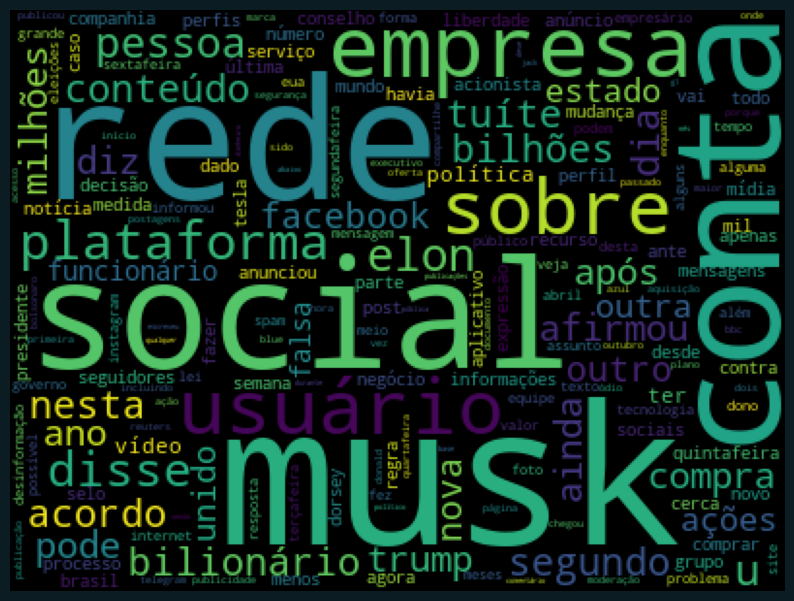

In [71]:
cloud = WordCloud(collocations=False,
                  max_font_size=100, 
                  width=400, 
                  height=300, 
                  background_color='black').generate(out)
figure(figsize=(10,8))
imshow(cloud)
axis('off')
show()